# About

The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

## Understanding the Problem

What is Customer Churn?

It refers to the rate of attrition at which the customers stop doing business with an entity. In our case, we are interested in finding out the customers who discontinue their subscription services from our E-Commerce industry.

With this in mind, the report aims to go through the following specific objectives, which shall also serve as guide in the structure of our report:

1. <b>Define the Problem.</b> Measure the customer churning problem at hand in terms of churn rate and revenue churned<br>
2. <b>Identify Causes for Churning: </b>Determine the causes and intention of customers to discontinue their services.<br>
3. <b>High-Value Customers vs Churned Customers.</b> The former are highly valuable and loyal to the company for their large contribution to revenue generation.</b> An assessment among these two customer types can be conducted to find out how churned customers can be effectively and prospectively converted to high-value customers.<br>
4. <b>Propose Recommendations. </b>Provide recommendations that are consistently valid and justified in line with Steps 2 and 3.<br>

# About Features


<b><i>Data Variable Discription</b></i><br><br>
* <b>CustomerID:</b> Unique customer ID<br>
* <b>Churn: </b> Churn Flag<br>
* <b>Tenure: </b> Tenure of customer in organization<br>
* <b>PreferredLog/inDevice: </b> Preferred login device of customer<br>
* <b>CityTier: </b> City tier<br>
* <b>WarehouseToHome: </b> Distance in between warehouse to home of customer<br>
*  <b>PreferredPaymentMode: </b> Preferred payment method of customer<br>
*  <b>Gender: </b> Gender of customer<br>
* <b>HourSpendOnApp: </b> Number of hours spend on mobile application or website<br>
* <b>NumberOfDeviceRegistered: </b> Total number of deceives is registered on particular customer<br>
* <b>PreferedOrderCat: </b> Preferred order category of customer in last month<br>
* <b>SatisfactionScore: </b> Satisfactory score of customer on service<br>
* <b>MaritalStatus: </b> Marital status of customer<br>
* <b>NumberOfAddress: </b> Total number of added added on particular customer<br>
* <b>Complain: </b> Any complaint has been raised in last month<br>
* <b>OrderAmountHikeFromlastYear: </b> Percentage increases in order from last year<br>
*  <b>CouponUsed: </b> Total number of coupon has been used in last month<br>
*  <b>OrderCount: </b> Total number of orders has been places in last month<br>
* <b>DaySinceLastOrder: </b> Day Since last order by customer<br>
* <b>CashbackAmount: </b> Average cashback in last month<br>

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report

In [2]:
import matplotlib.pyplot as plt

In [3]:
#Reading data
df=pd.read_excel(io="E Commerce Dataset.xlsx",sheet_name="E Comm")

In [4]:
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [5]:
#columns
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [6]:
#getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
#checking missing value, which columns have it
(df.isnull().mean()*100).round(2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

In [8]:
df_num=df.select_dtypes(exclude="object")
df_cat=df.select_dtypes(exclude=["int","float"])

In [9]:
#numerical missing value
print("Numerical Column which have missing value: \n")
missing_num=[col for col in df_num.columns if df_num[col].isnull().sum()>0]
print(missing_num)

Numerical Column which have missing value: 

['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']


In [10]:
#categorical missing value
print(df_cat.isnull().sum())

PreferredLoginDevice    0
PreferredPaymentMode    0
Gender                  0
PreferedOrderCat        0
MaritalStatus           0
dtype: int64


There is no missing value in categorical features

In [11]:
#checking duplicate value
df.duplicated().sum()

0

There is no duplicate value

In [12]:
#statistical value of numerical features
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [13]:
#coping dataset
df_churn=df.copy()

In [14]:
#There is no use of id column so droping id column
df_churn=df_churn.drop(columns=["CustomerID"],axis="columns")

In [15]:
for col in df_num.columns:
    print(col)
    print(f"Unique Number  : {df_num[col].nunique()}")
    print("Mean:", df_num[col].mean(),)
    print("Median:", df_num[col].median(),)
    print("Mode:", df_num[col].mode()[0])
    print("Kurtosis:", df_num[col].kurtosis())
    print("Standard Deviation:", df_num[col].std(),"\n")
    

CustomerID
Unique Number  : 5630
Mean: 52815.5
Median: 52815.5
Mode: 50001
Kurtosis: -1.2
Standard Deviation: 1625.3853389273572 

Churn
Unique Number  : 2
Mean: 0.16838365896980462
Median: 0.0
Mode: 0
Kurtosis: 1.1433768490855836
Standard Deviation: 0.37423986826764716 

Tenure
Unique Number  : 36
Mean: 10.189899366380917
Median: 9.0
Mode: 1.0
Kurtosis: -0.007369469517085392
Standard Deviation: 8.557240984165034 

CityTier
Unique Number  : 3
Mean: 1.6547069271758437
Median: 1.0
Mode: 1
Kurtosis: -1.4015292942601079
Standard Deviation: 0.9153892691210636 

WarehouseToHome
Unique Number  : 34
Mean: 15.639895891429633
Median: 14.0
Mode: 9.0
Kurtosis: 9.986930421469834
Standard Deviation: 8.53147518676267 

HourSpendOnApp
Unique Number  : 6
Mean: 2.9315348837209303
Median: 3.0
Mode: 3.0
Kurtosis: -0.6670761369791416
Standard Deviation: 0.7219258499760318 

NumberOfDeviceRegistered
Unique Number  : 6
Mean: 3.68898756660746
Median: 4.0
Mode: 4
Kurtosis: 0.5828487315797424
Standard Deviation

In [16]:
df_churn

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1     4.0         Mobile Phone         3              6.0   
1         1     NaN                Phone         1              8.0   
2         1     NaN                Phone         1             30.0   
3         1     0.0                Phone         3             15.0   
4         1     0.0                Phone         1             12.0   
...     ...     ...                  ...       ...              ...   
5625      0    10.0             Computer         1             30.0   
5626      0    13.0         Mobile Phone         1             13.0   
5627      0     1.0         Mobile Phone         1             11.0   
5628      0    23.0             Computer         3              9.0   
5629      0     8.0         Mobile Phone         1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female             3.0                         3   
1                     UPI    Male             3.0                         4   
2              Debit Card    Male             2.0                         4   
3              Debit Card    Male             2.0                         4   
4                      CC    Male             NaN                         3   
...                   ...     ...             ...                       ...   
5625          Credit Card    Male             3.0                         2   
5626          Credit Card    Male             3.0                         5   
5627           Debit Card    Male             3.0                         2   
5628          Credit Card    Male             4.0                         5   
5629          Credit Card    Male             3.0                         2   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0     Laptop & Accessory                  2        Single                9   
1                 Mobile                  3        Single                7   
2                 Mobile                  3        Single                6   
3     Laptop & Accessory                  5        Single                8   
4                 Mobile                  5        Single                3   
...                  ...                ...           ...              ...   
5625  Laptop & Accessory                  1       Married                6   
5626             Fashion                  5       Married                6   
5627  Laptop & Accessory                  4       Married                3   
5628  Laptop & Accessory                  4       Married                4   
5629  Laptop & Accessory                  3       Married                4   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0            1                         11.0         1.0         1.0   
1            1                         15.0         0.0         1.0   
2            1                         14.0         0.0         1.0   
3            0                         23.0         0.0         1.0   
4            0                         11.0         1.0         1.0   
...        ...                          ...         ...         ...   
5625         0                         18.0         1.0         2.0   
5626         0                         16.0         1.0         2.0   
5627         1                         21.0         1.0         2.0   
5628         0                         15.0         2.0         2.0   
5629         0                         13.0         2.0         2.0   

      DaySinceLastOrder  CashbackAmount  
0                   5.0          159.93  
1                   0.0          120.90  
2                   3.0          120.28  
3                   3.0          134.07  
4                   3.0          129.60  
...                 ...             ...  
5625                4.0          150.71  
5626                NaN          224.91  
5627                4.0          186

In [17]:
def cat_count(df_cat):    
    for col in df_cat:
        
        print(f"Unique Number of {col}: ",df_churn[col].nunique(),"\n")
        print(df_churn[col].value_counts(),"\n\n")
        
cat_count(df_cat)

Unique Number of PreferredLoginDevice:  3 

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64 


Unique Number of PreferredPaymentMode:  7 

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64 


Unique Number of Gender:  2 

Male      3384
Female    2246
Name: Gender, dtype: int64 


Unique Number of PreferedOrderCat:  6 

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64 


Unique Number of MaritalStatus:  3 

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64 




In [18]:
df_churn

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1     4.0         Mobile Phone         3              6.0   
1         1     NaN                Phone         1              8.0   
2         1     NaN                Phone         1             30.0   
3         1     0.0                Phone         3             15.0   
4         1     0.0                Phone         1             12.0   
...     ...     ...                  ...       ...              ...   
5625      0    10.0             Computer         1             30.0   
5626      0    13.0         Mobile Phone         1             13.0   
5627      0     1.0         Mobile Phone         1             11.0   
5628      0    23.0             Computer         3              9.0   
5629      0     8.0         Mobile Phone         1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female             3.0                         3   
1                     UPI    Male             3.0                         4   
2              Debit Card    Male             2.0                         4   
3              Debit Card    Male             2.0                         4   
4                      CC    Male             NaN                         3   
...                   ...     ...             ...                       ...   
5625          Credit Card    Male             3.0                         2   
5626          Credit Card    Male             3.0                         5   
5627           Debit Card    Male             3.0                         2   
5628          Credit Card    Male             4.0                         5   
5629          Credit Card    Male             3.0                         2   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0     Laptop & Accessory                  2        Single                9   
1                 Mobile                  3        Single                7   
2                 Mobile                  3        Single                6   
3     Laptop & Accessory                  5        Single                8   
4                 Mobile                  5        Single                3   
...                  ...                ...           ...              ...   
5625  Laptop & Accessory                  1       Married                6   
5626             Fashion                  5       Married                6   
5627  Laptop & Accessory                  4       Married                3   
5628  Laptop & Accessory                  4       Married                4   
5629  Laptop & Accessory                  3       Married                4   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0            1                         11.0         1.0         1.0   
1            1                         15.0         0.0         1.0   
2            1                         14.0         0.0         1.0   
3            0                         23.0         0.0         1.0   
4            0                         11.0         1.0         1.0   
...        ...                          ...         ...         ...   
5625         0                         18.0         1.0         2.0   
5626         0                         16.0         1.0         2.0   
5627         1                         21.0         1.0         2.0   
5628         0                         15.0         2.0         2.0   
5629         0                         13.0         2.0         2.0   

      DaySinceLastOrder  CashbackAmount  
0                   5.0          159.93  
1                   0.0          120.90  
2                   3.0          120.28  
3                   3.0          134.07  
4                   3.0          129.60  
...                 ...             ...  
5625                4.0          150.71  
5626                NaN          224.91  
5627                4.0          186

In [19]:
#making two same category into one by chaging name
df_churn["PreferredLoginDevice"]=df_churn["PreferredLoginDevice"].replace({"Phone":"Mobile Phone"})
df_churn["PreferredPaymentMode"]=df_churn["PreferredPaymentMode"].replace({"COD":"Cash on Delivery"})
df_churn["PreferedOrderCat"]=df_churn["PreferedOrderCat"].replace({"Mobile":"Mobile Phone"})

In [20]:
#now again checking categories of data

cat_col=df_cat.columns
cat_count(cat_col)

Unique Number of PreferredLoginDevice:  2 

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64 


Unique Number of PreferredPaymentMode:  6 

Debit Card          2314
Credit Card         1501
E wallet             614
Cash on Delivery     514
UPI                  414
CC                   273
Name: PreferredPaymentMode, dtype: int64 


Unique Number of Gender:  2 

Male      3384
Female    2246
Name: Gender, dtype: int64 


Unique Number of PreferedOrderCat:  5 

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64 


Unique Number of MaritalStatus:  3 

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64 




There are three columns PreferredLoginDevice,PreferredPaymentMode and PreferedOrderCat in which some data define for different different categories but uses for same work, so convert them into 1 category

### Exploratory Data Analysis

#### Univariate Analysis

In [21]:
num_col=df_num.columns

In [22]:
num_col

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

TENURE 

Mean:  10.189899366380917
Median:  9.0
Mode:  1.0


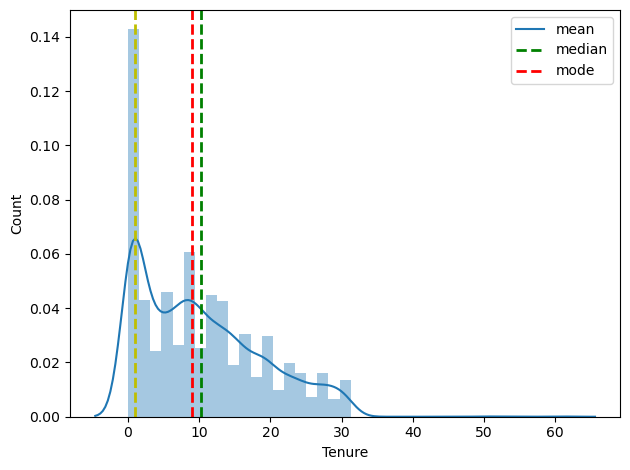

WAREHOUSETOHOME 

Mean:  15.639895891429633
Median:  14.0
Mode:  9.0


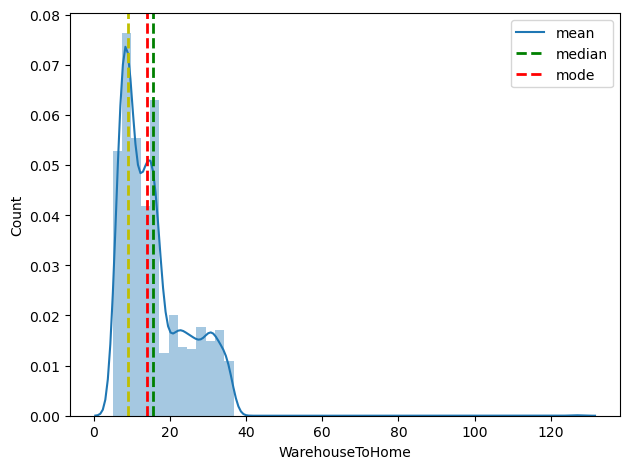

HOURSPENDONAPP 

Mean:  2.9315348837209303
Median:  3.0
Mode:  3.0


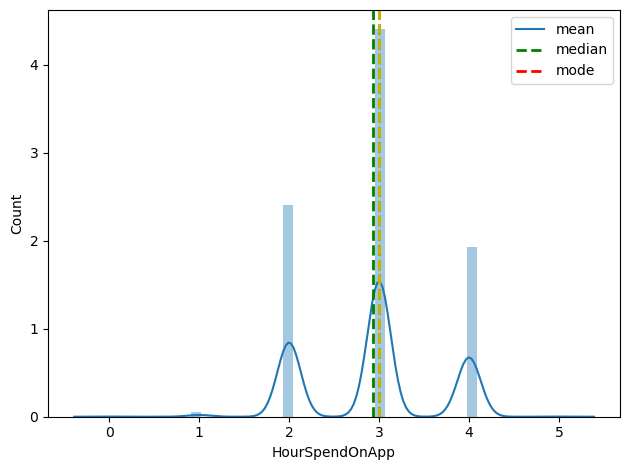

SATISFACTIONSCORE 

Mean:  3.066785079928952
Median:  3.0
Mode:  3


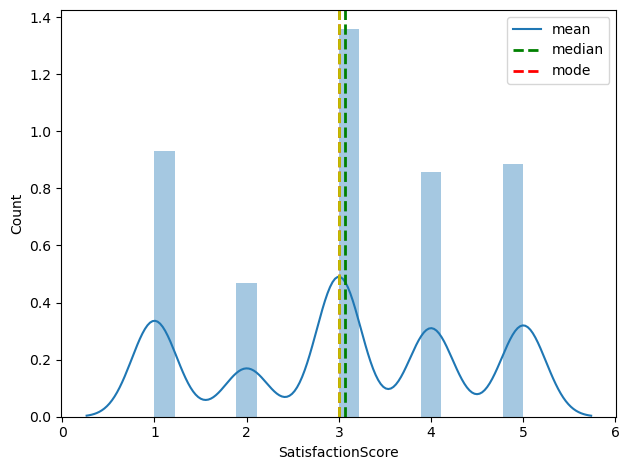

ORDERAMOUNTHIKEFROMLASTYEAR 

Mean:  15.707921714818266
Median:  15.0
Mode:  14.0


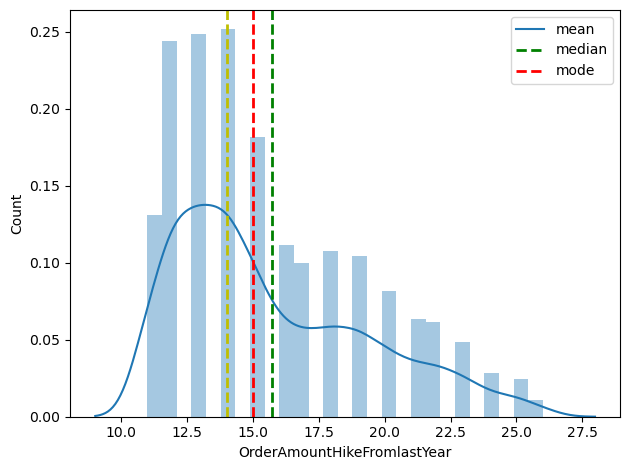

DAYSINCELASTORDER 

Mean:  4.543490512868683
Median:  3.0
Mode:  3.0


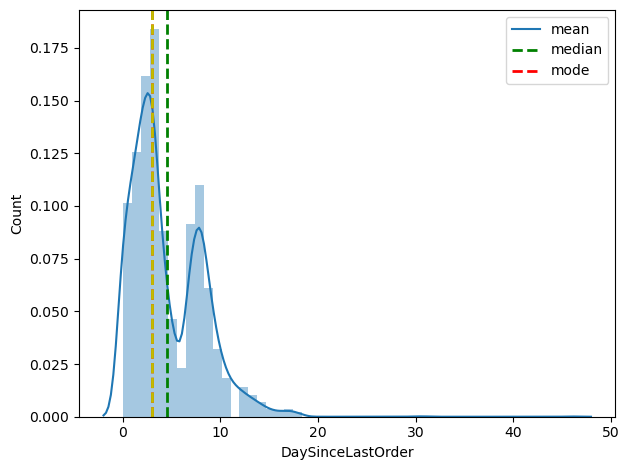

CASHBACKAMOUNT 

Mean:  177.22303019538188
Median:  163.28
Mode:  123.41999999999999


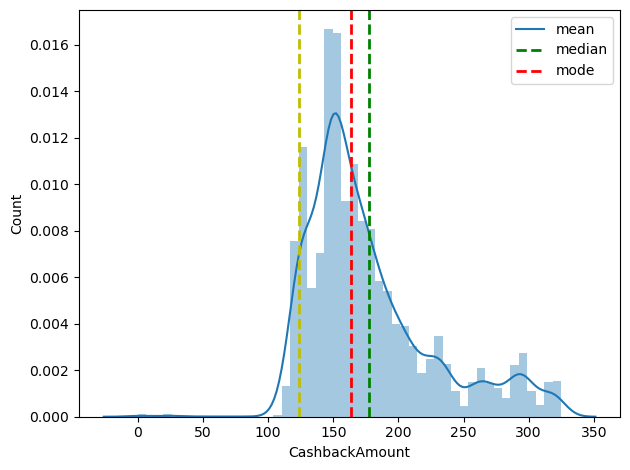

In [23]:
for col in ["Tenure","WarehouseToHome",'HourSpendOnApp','SatisfactionScore','OrderAmountHikeFromlastYear','DaySinceLastOrder', 'CashbackAmount']: 
    print(col.upper(),"\n")
    mean=df_num[col].mean()
    median=df_num[col].median()
    mode=df_num[col].mode()[0]
    print("Mean: ", mean)
    print("Median: ", median)
    print("Mode: ", mode)
  
    fig=sns.distplot(df_num[col],kde=True)
    fig.axvline(mean,color="g",lw=2,ls="--")
    fig.axvline(median,color="r",lw=2,ls="--")
    fig.axvline(mode,color="y",lw=2,ls="--")
   
    plt.tight_layout()
    plt.legend({"mean":mean,"median":median,"mode":mode})
    plt.ylabel("Count")
    plt.show()

Tenure have almost same mean and median but it have very low mode value, Tenure data is right skewed,it has a very long tail.
CashbackAmount have difference between mean,median and mode,and it is left skewed  
Except Tenure and cashbackAmount all numerical feature have almost same mean,mode and median


In [24]:
# fig,ax=plt.subplots(7,2,figsize=(10,9))
# index=0
# ax=ax.flatten()
# for col in df_num.columns:
#     sns.boxplot(data=df_num,x=col,ax=ax[index],color="red")
#     plt.tight_layout()
#     index+=1
# plt.show()

There are outliers in the dataset

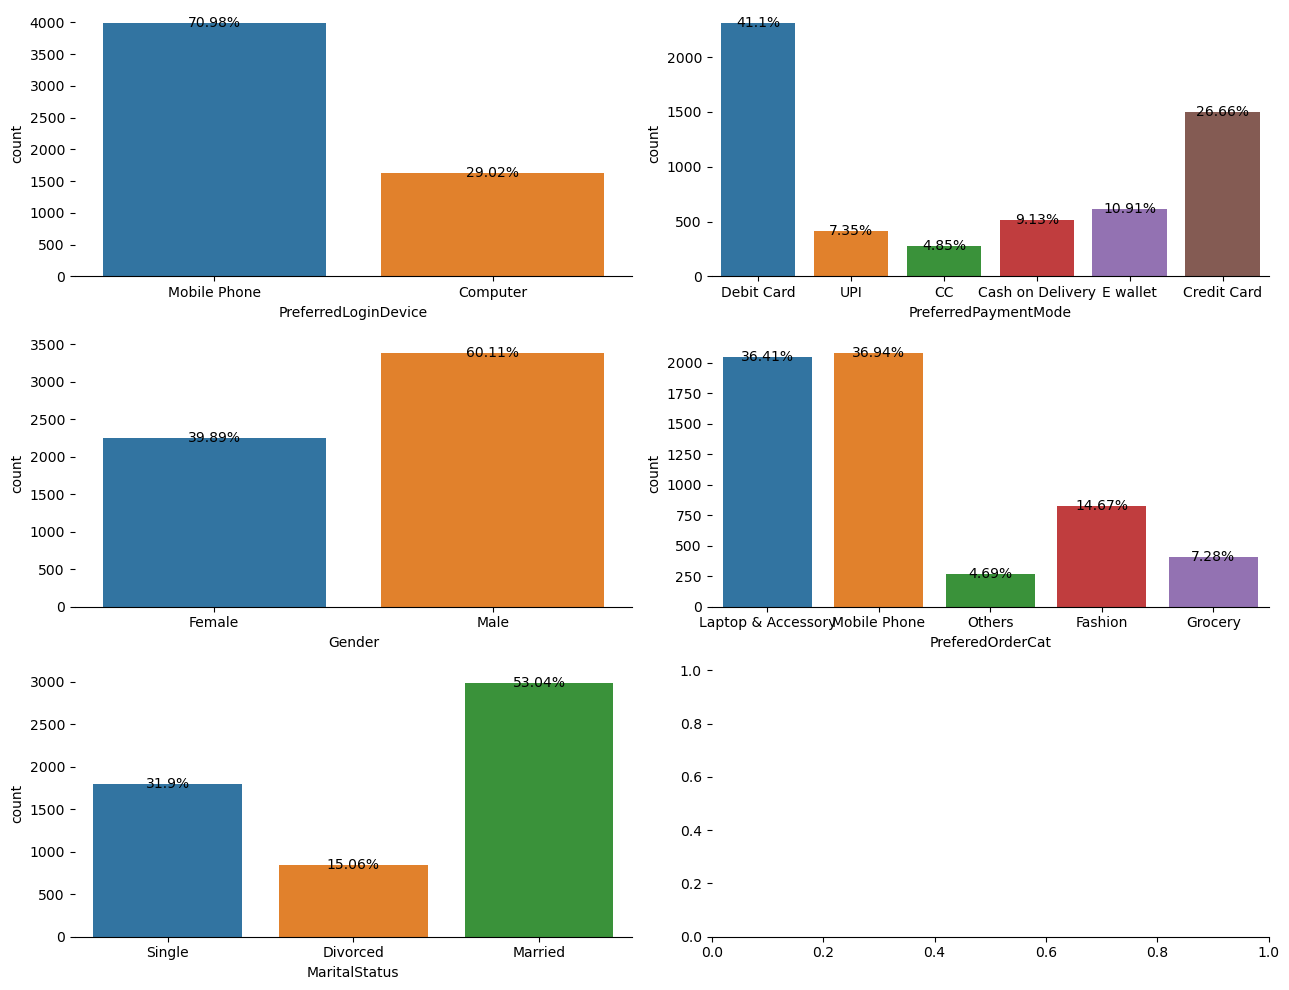

In [25]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(13,10))
ax=ax.flatten()
index=0
for col in cat_col:
    fig=sns.countplot(x=df_churn[col],ax=ax[index])
    index+=1
    sns.despine(top=True,left=True,right=True)
    plt.tight_layout()
    for f in fig.patches:
        text=f"{(f.get_height()/len(df_churn[col])*100).round(2)}%"
        fig.annotate(text,(f.get_x()+f.get_width()/2,f.get_height()),ha="center",va="center")
plt.show()

Churn  Percentage
0   4682   83.161634
1    948   16.838366

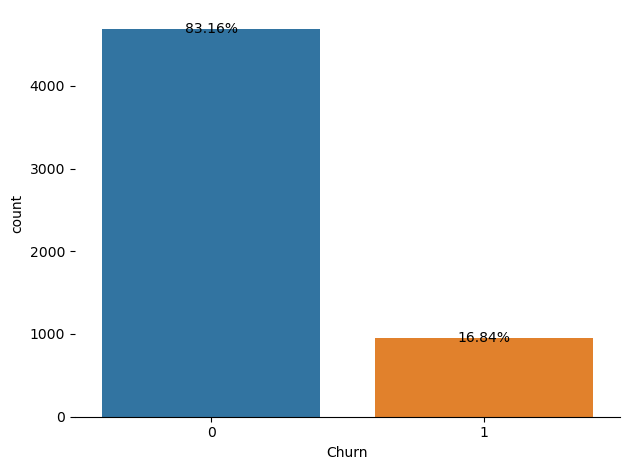

In [26]:
df_frame=df_churn["Churn"].value_counts().to_frame()
df_frame["Percentage"]=df_frame.apply(lambda x:x/len(df_churn)*100)
display(df_frame)

fig=sns.countplot(x=df_churn["Churn"])
sns.despine(top=True,left=True,right=True)
plt.tight_layout()
for f in fig.patches:
    text=f"{(f.get_height()/len(df_churn['Churn'])*100).round(2)}%"
    fig.annotate(text,(f.get_x()+f.get_width()/2,f.get_height()),ha="center",va="center")
plt.show()

In [27]:
import plotly.express as px

In [28]:

for col in cat_col:
    fig=px.histogram(x=col,data_frame=df_churn,color=df_churn["Churn"])
    index+=1
    sns.despine(top=True,left=True,right=True)
    plt.tight_layout()
    fig.show()

<Figure size 640x480 with 0 Axes>

#### Bivariate Analysis & Multivariate Analysis

In [29]:
#checking correlation
df_num.corr()

CustomerID     Churn    Tenure  CityTier  \
CustomerID                     1.000000 -0.019083  0.029952  0.003239   
Churn                         -0.019083  1.000000 -0.349408  0.084703   
Tenure                         0.029952 -0.349408  1.000000 -0.060688   
CityTier                       0.003239  0.084703 -0.060688  1.000000   
WarehouseToHome                0.058909  0.076630 -0.018218  0.010624   
HourSpendOnApp                 0.598417  0.018675 -0.021226 -0.009150   
NumberOfDeviceRegistered       0.411098  0.107939 -0.023983  0.027934   
SatisfactionScore             -0.033146  0.105481 -0.013903 -0.011554   
NumberOfAddress                0.160814  0.043931  0.237666 -0.029440   
Complain                      -0.009944  0.250188 -0.021268  0.003375   
OrderAmountHikeFromlastYear    0.117243 -0.010058  0.005825 -0.031408   
CouponUsed                     0.234302 -0.008264  0.129035  0.021456   
OrderCount                     0.139008 -0.028697  0.186403  0.033388   
DaySinceLastOrder              0.113243 -0.160757  0.184552  0.017525   
CashbackAmount                 0.217129 -0.154118  0.476380  0.055746   

                             WarehouseToHome  HourSpendOnApp  \
CustomerID                          0.058909        0.598417   
Churn                               0.076630        0.018675   
Tenure                             -0.018218       -0.021226   
CityTier                            0.010624       -0.009150   
WarehouseToHome                     1.000000        0.060990   
HourSpendOnApp                      0.060990        1.000000   
NumberOfDeviceRegistered            0.019071        0.316800   
SatisfactionScore                   0.007722        0.031858   
NumberOfAddress                    -0.011020        0.145126   
Complain                            0.028696        0.006976   
OrderAmountHikeFromlastYear         0.038795        0.106843   
CouponUsed                         -0.003935        0.191528   
OrderCount                          0.002681        0.109575   
DaySinceLastOrder                   0.017829        0.075716   
CashbackAmount                     -0.009200        0.121490   

                             NumberOfDeviceRegistered  SatisfactionScore  \
CustomerID                                   0.411098          -0.033146   
Churn                                        0.107939           0.105481   
Tenure                                      -0.023983          -0.013903   
CityTier                                     0.027934          -0.011554   
WarehouseToHome                              0.019071           0.007722   
HourSpendOnApp                               0.316800           0.031858   
NumberOfDeviceRegistered                     1.000000          -0.017228   
SatisfactionScore                           -0.017228           1.000000   
NumberOfAddress                              0.084997           0.053583   
Complain                                     0.003407          -0.031115   
OrderAmountHikeFromlastYear                  0.069475          -0.027730   
CouponUsed                                   0.151685           0.017936   
OrderCount                                   0.103464           0.019764   
DaySinceLastOrder                            0.018208           0.032082   
CashbackAmount                               0.137183           0.003473   

                             NumberOfAddress  Complain  \
CustomerID                          0.160814 -0.009944   
Churn                               0.043931  0.250188   
Tenure                              0.237666 -0.021268   
CityTier                           -0.029440  0.003375   
WarehouseToHome                    -0.011020  0.028696   
HourSpendOnApp                      0.145126  0.006976   
NumberOfDeviceRegistered            0.084997  0.003407   
SatisfactionScore                   0.053583 -0.031115   
NumberOfAddress                     1.000000 -0.026399   
Complain                           -0.

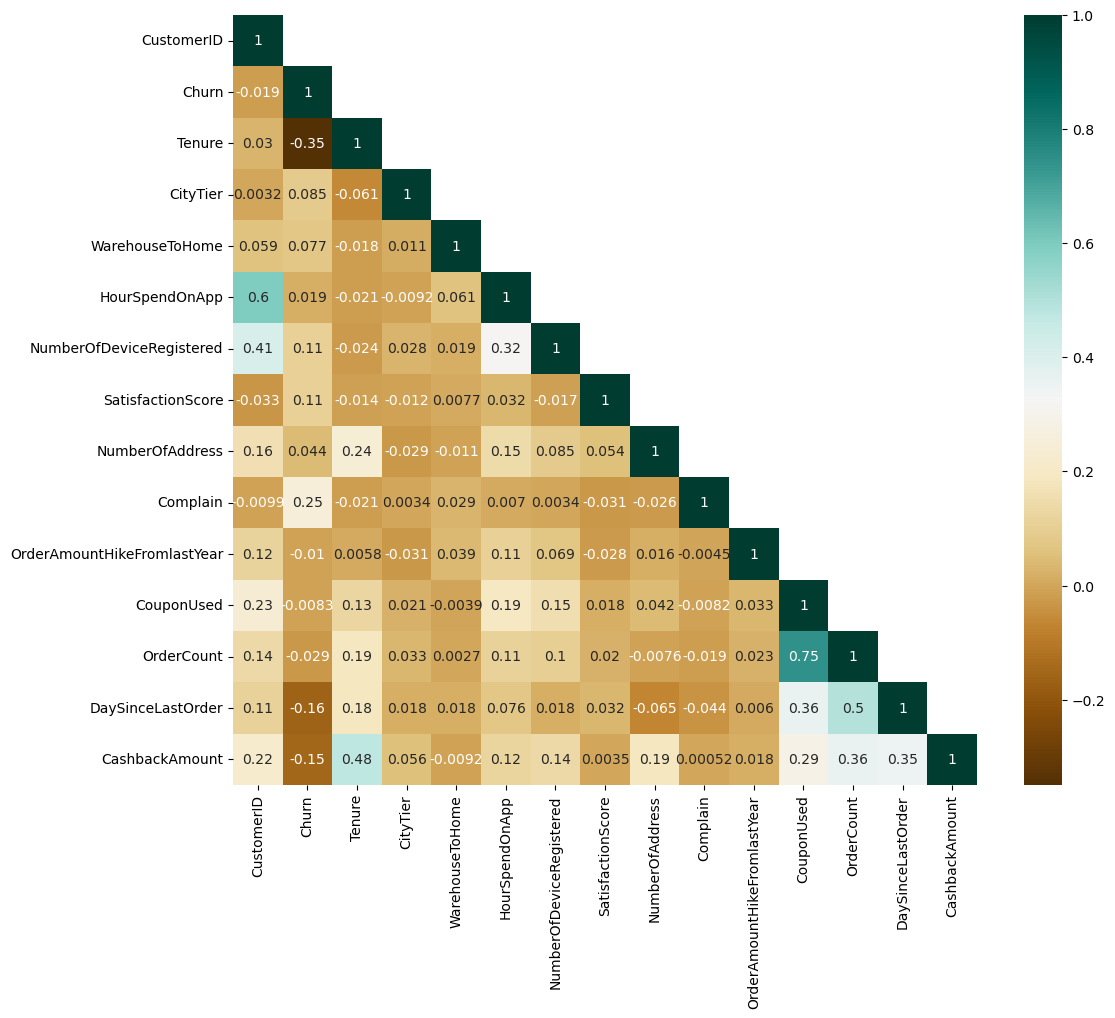

In [30]:
mask=np.triu(df_num.corr(),1)
plt.figure(figsize=(12,10))
sns.heatmap(df_num.corr(),mask=mask,cmap="BrBG",annot=True)
plt.show()

orderCount and couponUsed have high collinearity, they have 75% collinearity so we will remove one of them.since orderCount have collinearity with DaySinceLastOrder so will delete OrderCount,Tenure also have collinearity with CashbackAmount it is 0.48, but dont have high collinearity sowe will not delete any column from both of them.

<Figure size 2000x2000 with 0 Axes>

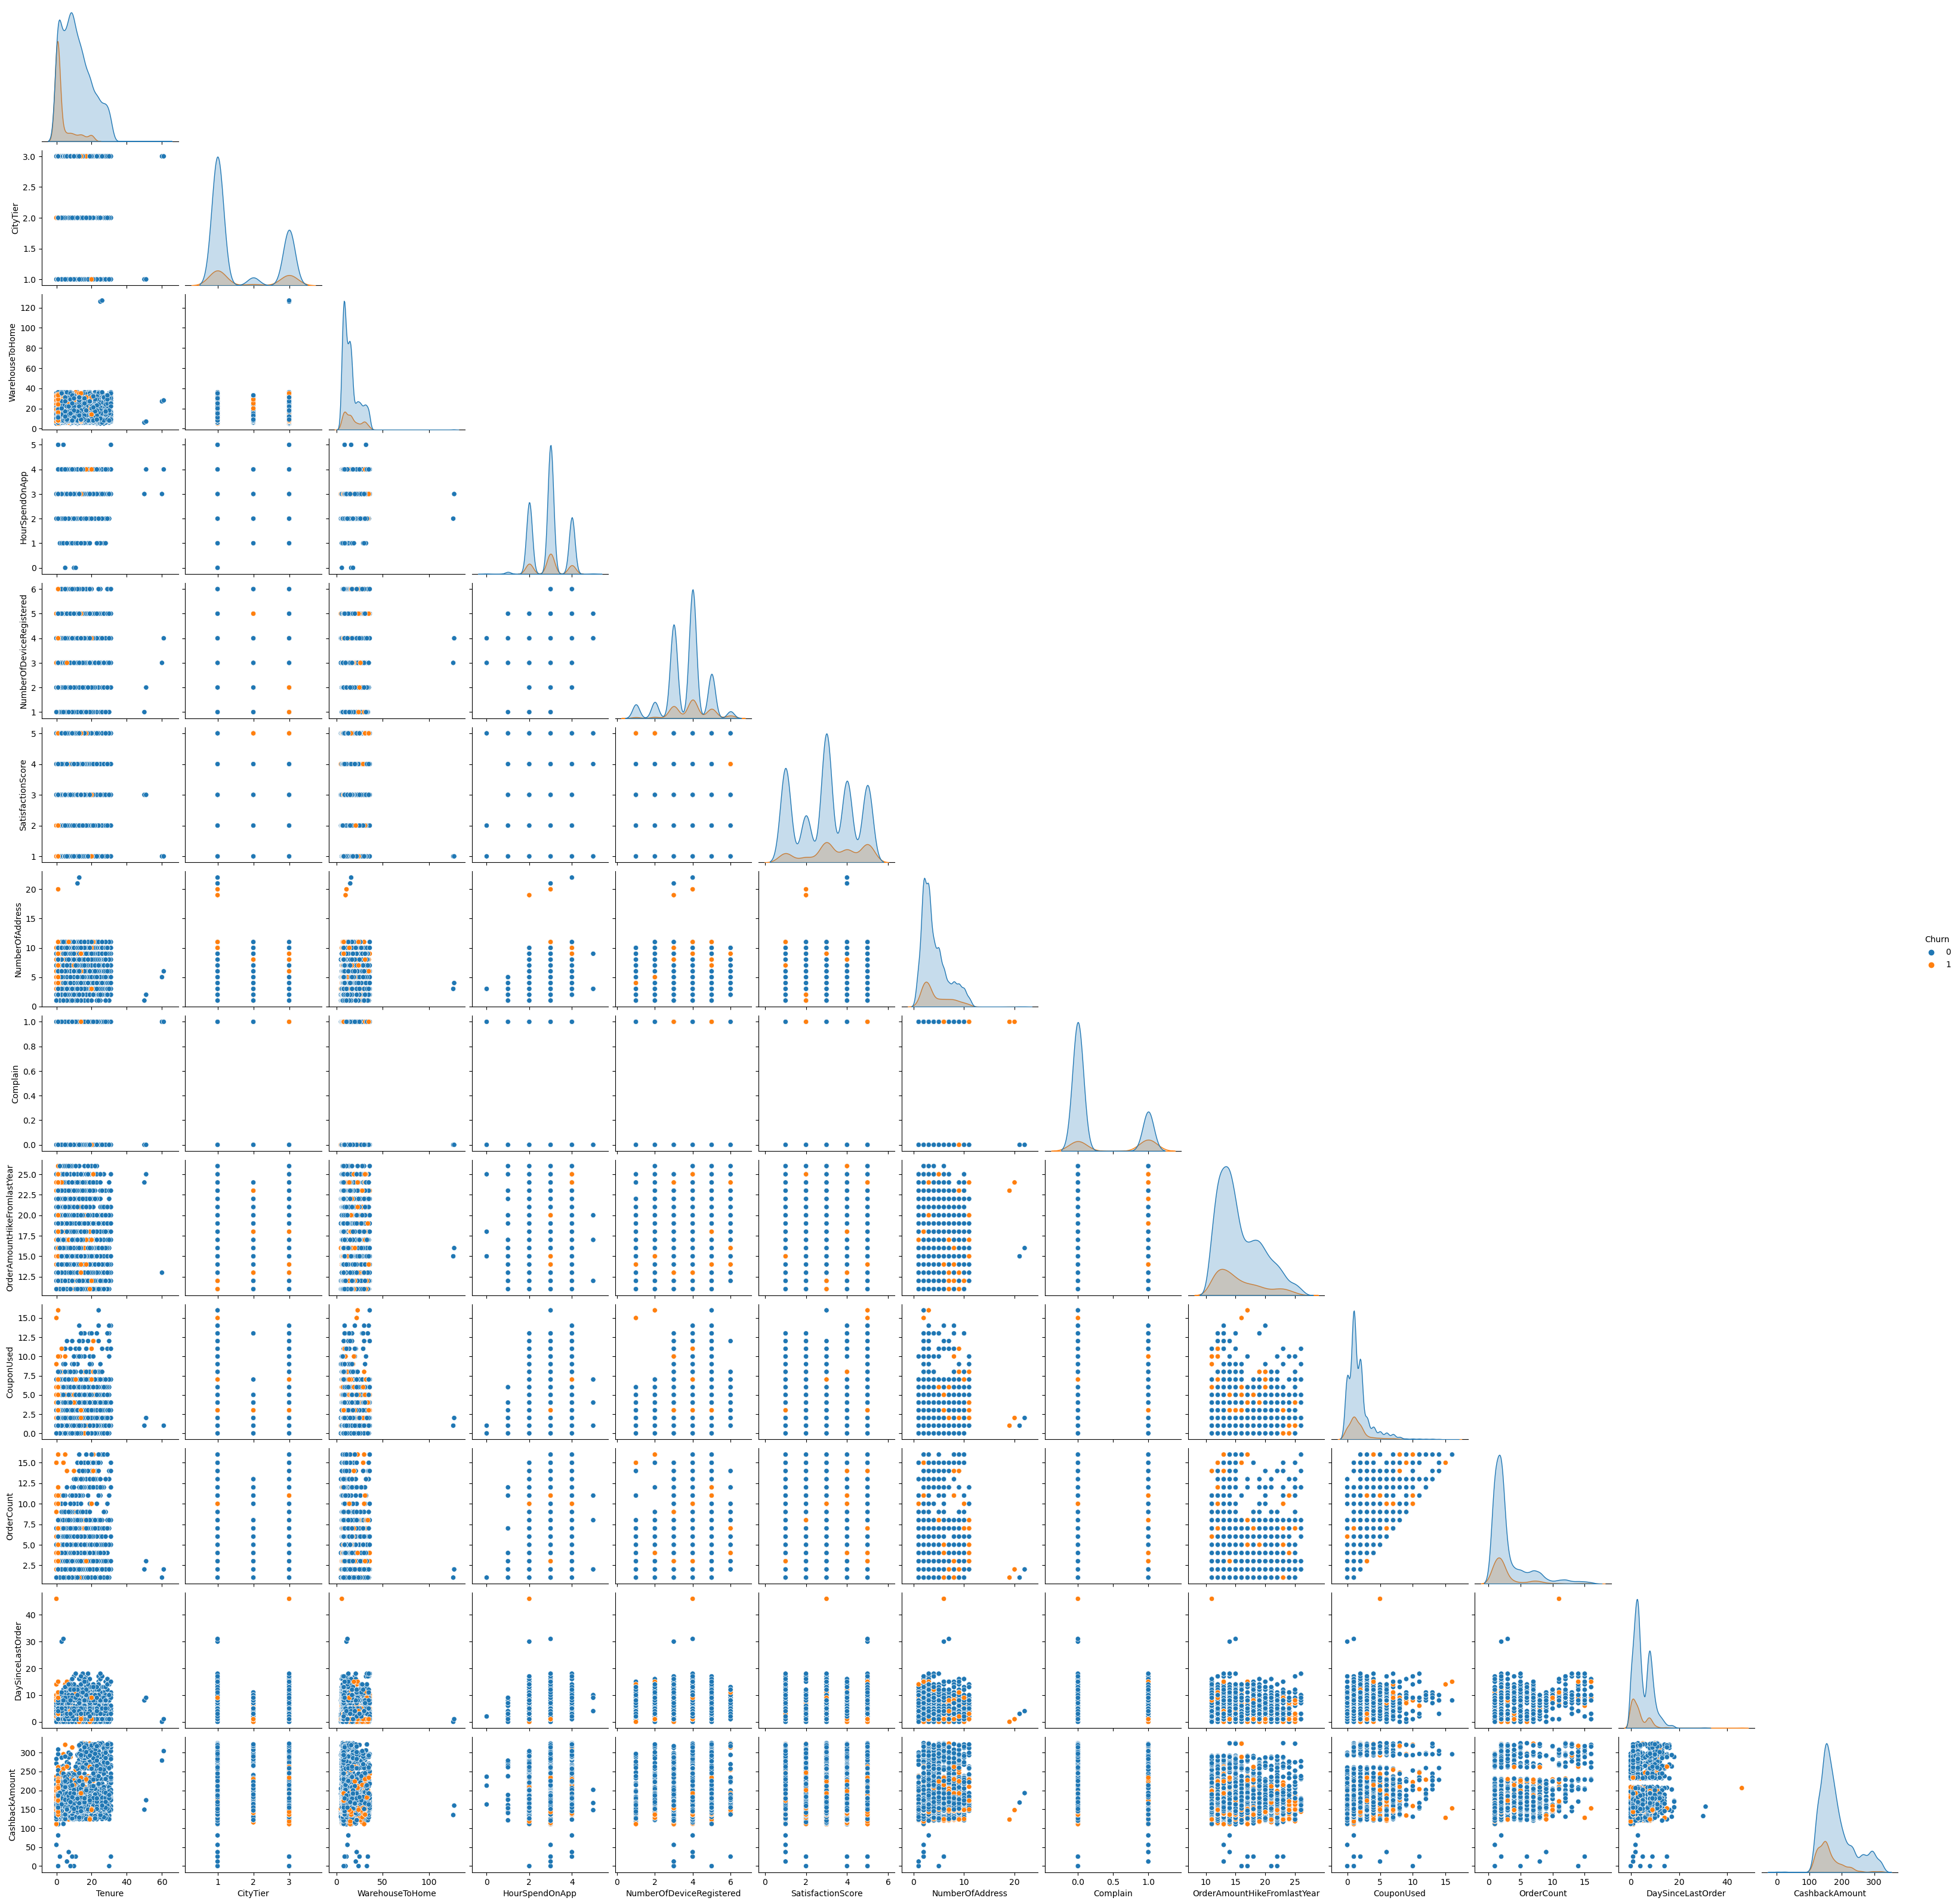

In [31]:
plt.figure(figsize=(20,20))
sns.pairplot(df_churn,corner=True,hue="Churn")
plt.show()

In [32]:
df_churn

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1     4.0         Mobile Phone         3              6.0   
1         1     NaN         Mobile Phone         1              8.0   
2         1     NaN         Mobile Phone         1             30.0   
3         1     0.0         Mobile Phone         3             15.0   
4         1     0.0         Mobile Phone         1             12.0   
...     ...     ...                  ...       ...              ...   
5625      0    10.0             Computer         1             30.0   
5626      0    13.0         Mobile Phone         1             13.0   
5627      0     1.0         Mobile Phone         1             11.0   
5628      0    23.0             Computer         3              9.0   
5629      0     8.0         Mobile Phone         1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female             3.0                         3   
1                     UPI    Male             3.0                         4   
2              Debit Card    Male             2.0                         4   
3              Debit Card    Male             2.0                         4   
4                      CC    Male             NaN                         3   
...                   ...     ...             ...                       ...   
5625          Credit Card    Male             3.0                         2   
5626          Credit Card    Male             3.0                         5   
5627           Debit Card    Male             3.0                         2   
5628          Credit Card    Male             4.0                         5   
5629          Credit Card    Male             3.0                         2   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0     Laptop & Accessory                  2        Single                9   
1           Mobile Phone                  3        Single                7   
2           Mobile Phone                  3        Single                6   
3     Laptop & Accessory                  5        Single                8   
4           Mobile Phone                  5        Single                3   
...                  ...                ...           ...              ...   
5625  Laptop & Accessory                  1       Married                6   
5626             Fashion                  5       Married                6   
5627  Laptop & Accessory                  4       Married                3   
5628  Laptop & Accessory                  4       Married                4   
5629  Laptop & Accessory                  3       Married                4   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0            1                         11.0         1.0         1.0   
1            1                         15.0         0.0         1.0   
2            1                         14.0         0.0         1.0   
3            0                         23.0         0.0         1.0   
4            0                         11.0         1.0         1.0   
...        ...                          ...         ...         ...   
5625         0                         18.0         1.0         2.0   
5626         0                         16.0         1.0         2.0   
5627         1                         21.0         1.0         2.0   
5628         0                         15.0         2.0         2.0   
5629         0                         13.0         2.0         2.0   

      DaySinceLastOrder  CashbackAmount  
0                   5.0          159.93  
1                   0.0          120.90  
2                   3.0          120.28  
3                   3.0          134.07  
4                   3.0          129.60  
...                 ...             ...  
5625                4.0          150.71  
5626                NaN          224.91  
5627                4.0          186

In [33]:
def Count(col):
    df_gender_churn=df_churn[col].value_counts().to_frame()
    df_gender_churn["percentage"]=df_gender_churn.apply(lambda x:x/len(df_churn)*100)
    display(df_gender_churn)
    fig=sns.countplot(x=col,data=df_churn,hue="Churn")
    sns.despine(top=True,left=True,right=True)
    for f in fig.patches:
        text=f"{(f.get_height()/len(df_churn['Churn'])*100).round(2)}%"
        fig.annotate(text,(f.get_x()+f.get_width()/2,f.get_height()),ha="center",va="center")
   
    plt.show()


Gender  percentage
Male      3384   60.106572
Female    2246   39.893428

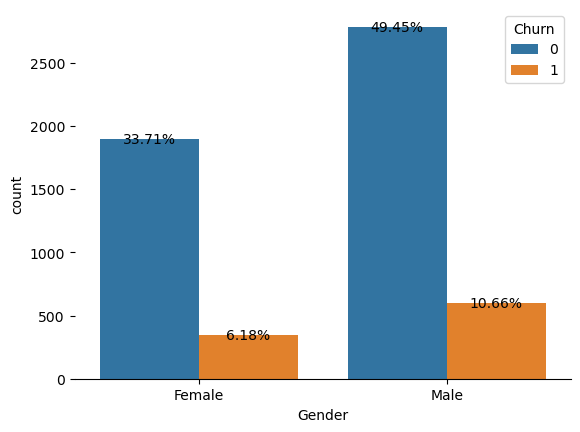

In [34]:
Count(col="Gender")

MaritalStatus  percentage
Married            2986   53.037300
Single             1796   31.900533
Divorced            848   15.062167

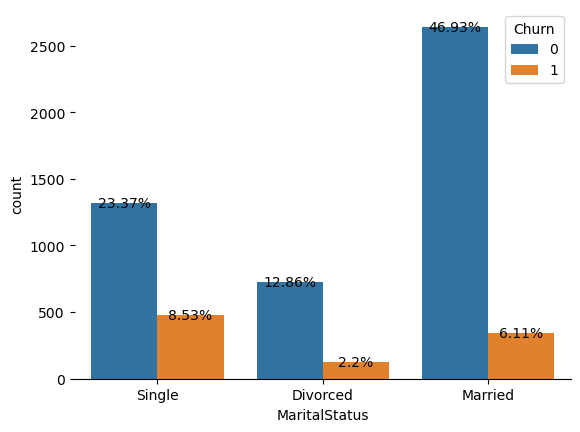

In [35]:
Count("MaritalStatus")

Churn                0                       1               
MaritalStatus Divorced Married Single Divorced Married Single
Gender                                                       
Female             300    1028    570       48     112    188
Male               424    1614    746       76     232    292

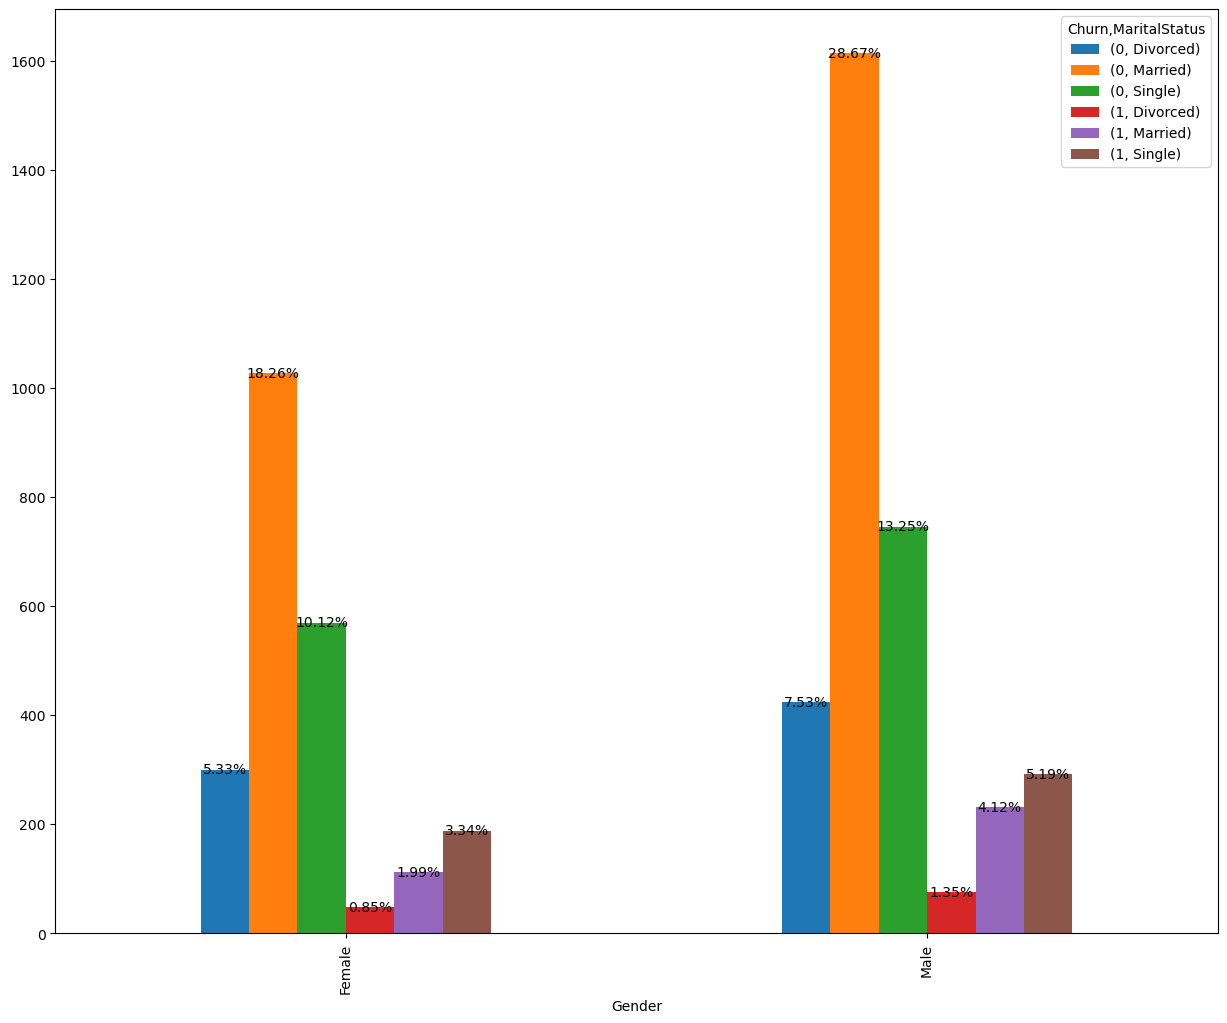

In [36]:
df_gender_marital=pd.crosstab(index=df_churn["Gender"],columns=[df_churn["Churn"],df_churn["MaritalStatus"]])
display(df_gender_marital)
fig=pd.crosstab(index=df_churn["Gender"],columns=[df_churn["Churn"],df_churn["MaritalStatus"]]).plot(kind="bar",figsize=(15,12))
for f in fig.patches:
    text=f"{(f.get_height()/len(df_churn['Churn'])*100).round(2)}%"
    fig.annotate(text,(f.get_x()+f.get_width()/2,f.get_height()),ha="center",va="center")

plt.show()

Complain  percentage
0      4026   71.509769
1      1604   28.490231

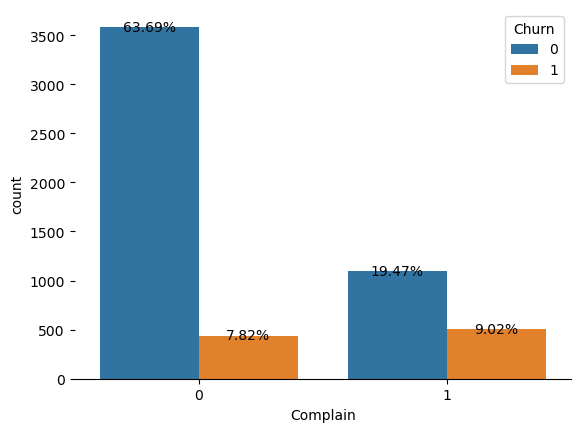

None


In [37]:
print(Count("Complain"))

In [38]:
df_churn["CityTier"].nunique()

3

CityTier  percentage
1      3666   65.115453
3      1722   30.586146
2       242    4.298401

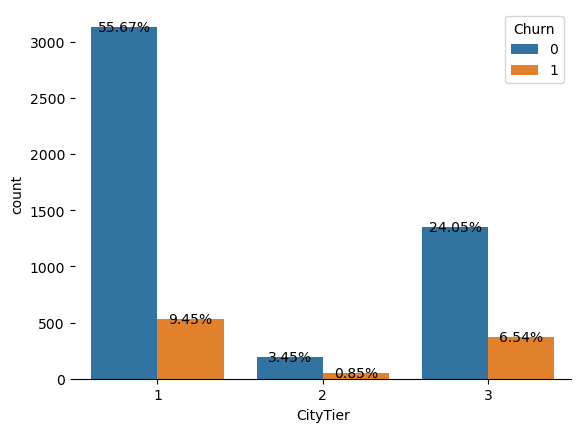

None


In [39]:
print(Count("CityTier"))

In [40]:
df_churn.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Churn        0         1     
Complain     0    1    0    1
CityTier                     
1         2386  748  236  296
2          152   42   28   20
3         1048  306  176  192

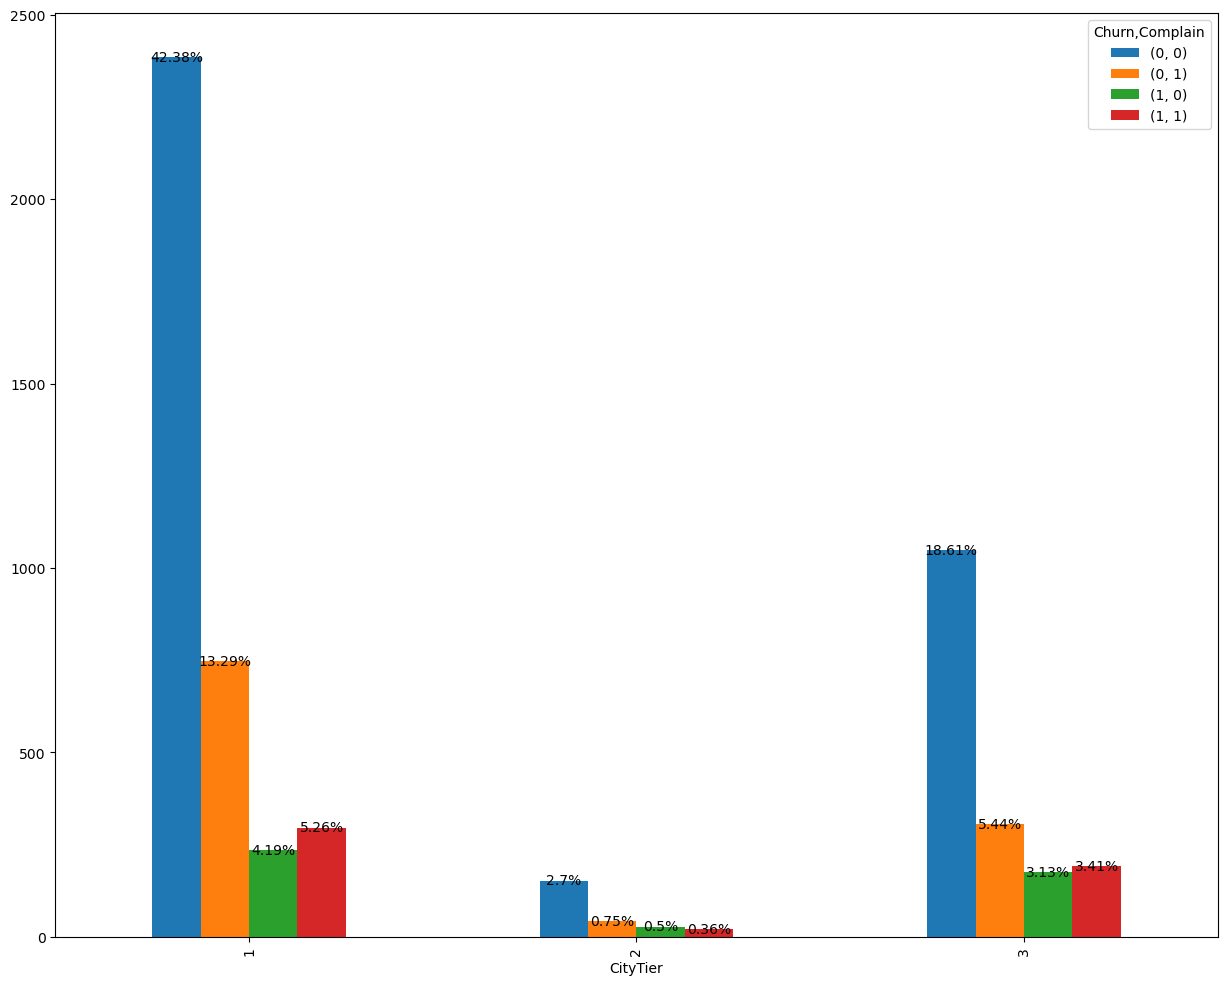

In [41]:
df_citytier_complain=pd.crosstab(index=df_churn["CityTier"],columns=[df_churn["Churn"],df_churn["Complain"]])
display(df_citytier_complain)
fig=pd.crosstab(index=df_churn["CityTier"],columns=[df_churn["Churn"],df_churn["Complain"]]).plot(kind="bar",figsize=(15,12))
for f in fig.patches:
    text=f"{(f.get_height()/len(df_churn['Churn'])*100).round(2)}%"
    fig.annotate(text,(f.get_x()+f.get_width()/2,f.get_height()),ha="center",va="center")

plt.show()

Churn         0            1     
Gender   Female  Male Female Male
CityTier                         
1          1270  1864    172  360
2            50   144     24   24
3           578   776    152  216

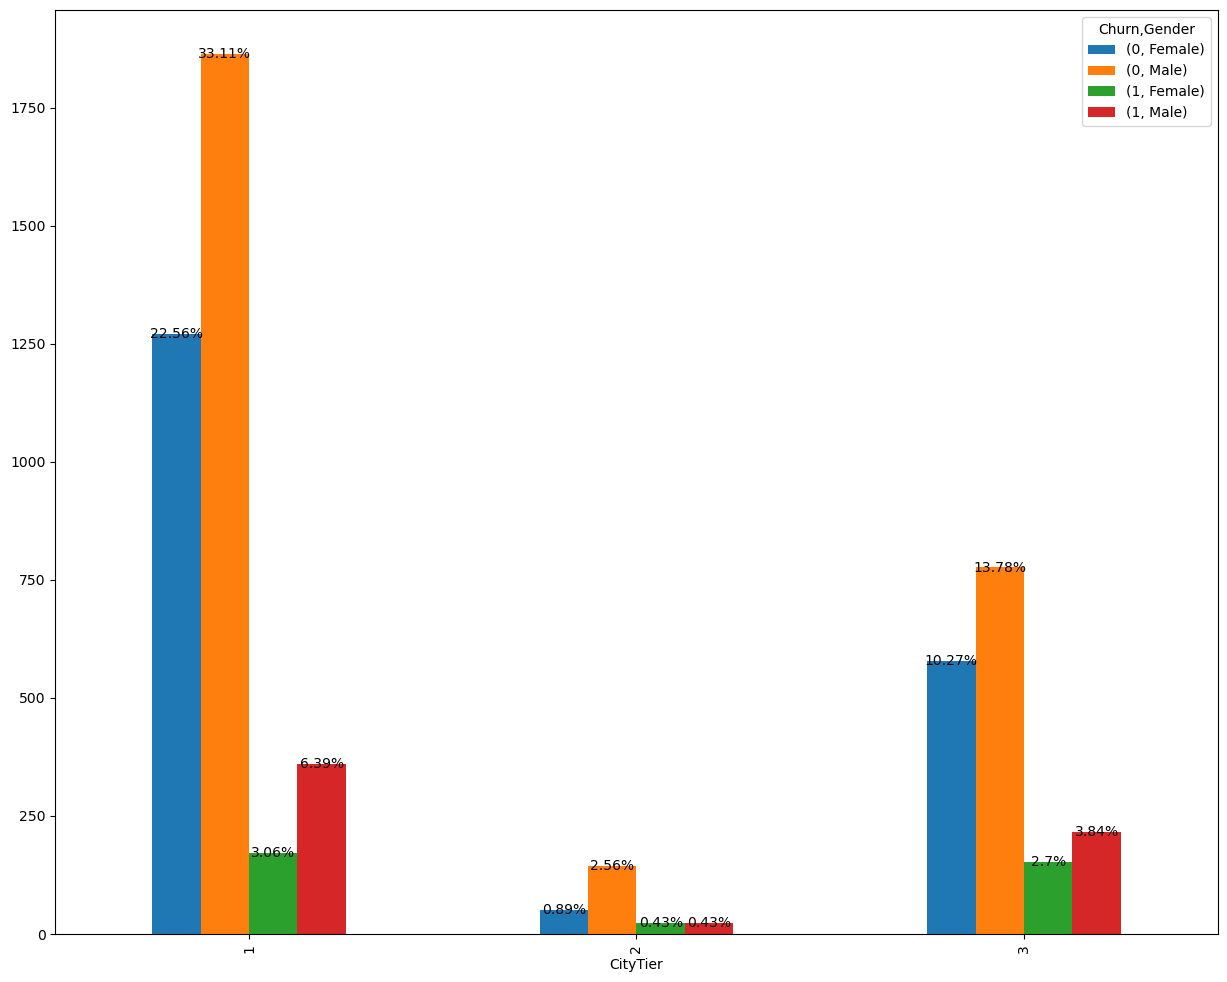

In [42]:
df_citytier_complain=pd.crosstab(index=df_churn["CityTier"],columns=[df_churn["Churn"],df_churn["Gender"]])
display(df_citytier_complain)
fig=pd.crosstab(index=df_churn["CityTier"],columns=[df_churn["Churn"],df_churn["Gender"]]).plot(kind="bar",figsize=(15,12))
for f in fig.patches:
    text=f"{(f.get_height()/len(df_churn['Churn'])*100).round(2)}%"
    fig.annotate(text,(f.get_x()+f.get_width()/2,f.get_height()),ha="center",va="center")

plt.show()

In [43]:
df_churn['OrderAmountHikeFromlastYear'].nunique()

16

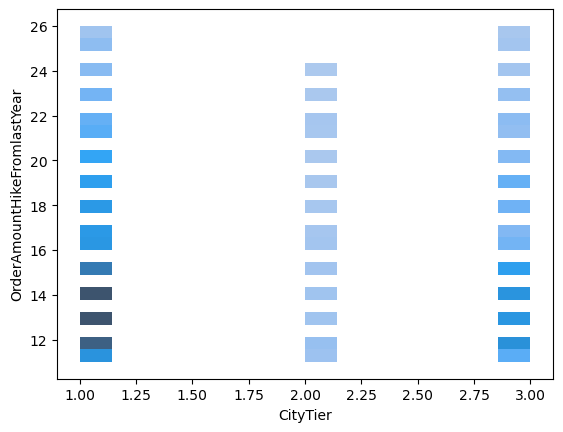

In [44]:
sns.histplot(y=df_churn['OrderAmountHikeFromlastYear'],x=df_churn["CityTier"])
plt.show()

In [45]:
df_churn['OrderAmountHikeFromlastYear']

0       11.0
1       15.0
2       14.0
3       23.0
4       11.0
        ... 
5625    18.0
5626    16.0
5627    21.0
5628    15.0
5629    13.0
Name: OrderAmountHikeFromlastYear, Length: 5630, dtype: float64

In [46]:
df_churn['SatisfactionScore'].nunique()

5

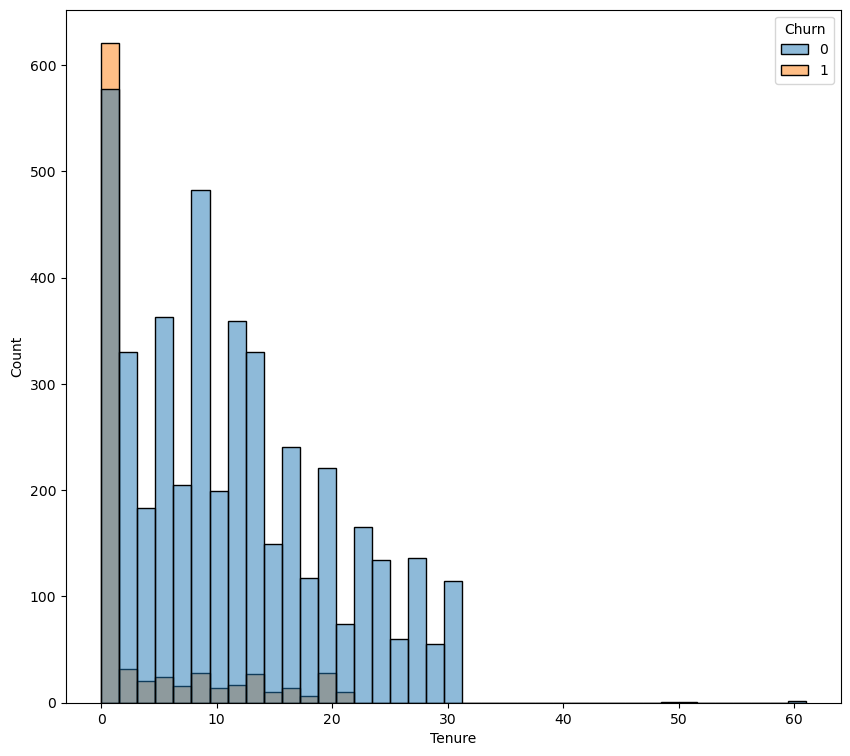

In [47]:
plt.figure(figsize=(10,9))
sns.histplot(x=df_churn['Tenure'],hue=df_churn["Churn"])
plt.show()

PreferedOrderCat  percentage
Mobile Phone                    2080   36.944938
Laptop & Accessory              2050   36.412078
Fashion                          826   14.671403
Grocery                          410    7.282416
Others                           264    4.689165

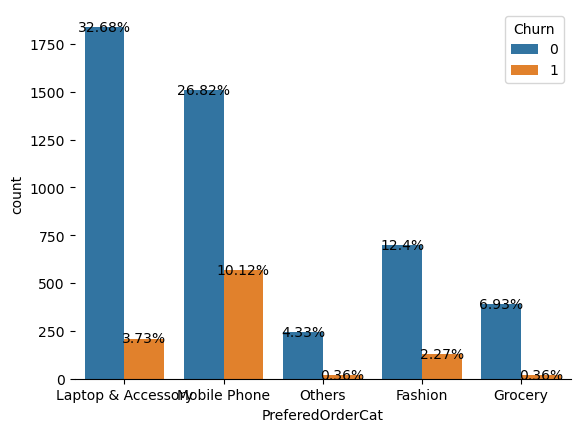

In [48]:
Count("PreferedOrderCat")

IndexError: index 14 is out of bounds for axis 0 with size 14

<Figure size 640x480 with 0 Axes>

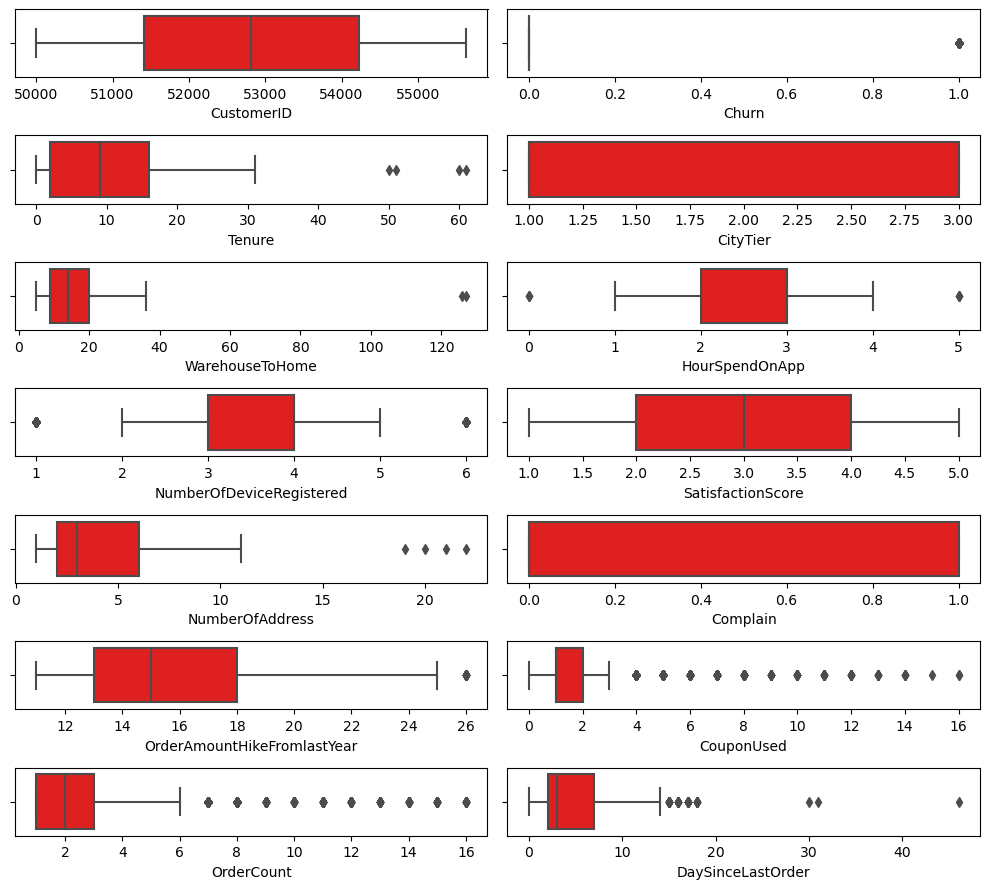

In [49]:
#checking Outliers
plt.figure()
fig,ax=plt.subplots(7,2,figsize=(10,9))
index=0
ax=ax.flatten()
for col in df_num.columns:
    sns.boxplot(data=df_num,x=col,ax=ax[index],color="red")
    plt.tight_layout()
    index+=1
plt.show()

In [ ]:
fig1=px.histogram(x="CouponUsed",data_frame=df_churn,color="Churn").show()
fig1=px.histogram(data_frame=df_churn,x="CashbackAmount",color="Churn").show()

<b>EDA Observation:</b><br><br>
    1.Those who have 0-2 range of tenure churn more frequently then other and tenure feature have outliers,and it is right skewed.<br>
    2.In our given dataset we have those data more of those who did not churn as compare to who churn, we have imbalanced dataset.<br>
    3.City Tier 1 and 3 have more data than city tier 2, and those who are from city tier 1 people churn more then who are from city tier 3,and city tier 3 churn more than tier 2.<br>
    4.Those who complain churn more
    5.Man more churn than female, and those man and female who are single and married are churn more than divorced<br>
    6.Mobile Phone and Laptop Acessories categories are more in the data, so Mobile Phone and Laptop Acessories are those 
    categorieswhich were preffered more by the costumer, and those people who purchase mobile phone churned more and after that 
    Laptop Accessories people churned more than other category.<br>
    7.Those who used less coupon churn more<br>

<b>Action Should Take for better result:</b><br><br>
1.Less tenure people churn frequently as compare to high tenure so we have to concentrate more on less tenure.<br>
2.Churn costumer come from tier 1 and tier 3 city, so we have to focus on those costumer who comes from these two cities<br>

3.Male churn more than female and mostly are married and single who churned, so we should focus on male costumers more.
female were also churned costumer who were single and married not divorced.<br>
4.Mobile Phone and Laptop Accesories used costumer churn more and those who got less coupon to use.
and costumer who churn mostly have complain 


## Data Preprocessing

In [ ]:
df_churn.drop("OrderCount",axis=1,inplace=True)

In [ ]:
#handlie missing value
for col in df_churn:
    if df_churn[col].isnull().sum()>0:
        df_churn[col]=df_churn[col].fillna(df_churn[col].median())

In [ ]:
df_churn.isnull().sum()

In [ ]:
#handling outliers
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
for col in df_num.columns:
    print(col, check_outlier(df, col))

In [ ]:
#encoding
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in df_num.columns:
    replace_with_thresholds(df,col)

In [ ]:
for col in df_num.columns:
    print(col, check_outlier(df, col))

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols = [col for col in df_churn.columns if df_churn[col].dtypes == "O" and df_churn[col].nunique() == 2]
binary_cols

cat_cols = [col for col in df_cat.columns if col not in binary_cols]

for col in binary_cols:
    df_churn = label_encoder(df_churn, col)

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first,dtype="int")
    return dataframe


df_churn = one_hot_encoder(df_churn, cat_cols, drop_first=True)

In [ ]:
df_churn.head()

In [ ]:
#splitting data
X=df_churn.drop(["Churn"],axis=1)
Y=df_churn["Churn"]
X

In [ ]:
X.isnull().sum()

In [ ]:
#balancing inbalanced data
from imblearn.over_sampling import SMOTE

In [ ]:
!pip install --upgrade imblearn

In [ ]:
smote=SMOTE(random_state=42)
x_sm,y_sm=smote.fit_resample(X,Y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3)

In [ ]:
#feature Scalling
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

x_train_scaled_df=pd.DataFrame(x_train_scaled)
x_train_test_df=pd.DataFrame(x_test_scaled)

## Modelling

In [ ]:
lr=LogisticRegression()

rf=RandomForestClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

In [ ]:
#getting Parameters

In [ ]:
lr.get_params()

In [ ]:
rf.get_params()

In [ ]:
lr.fit(x_train_scaled,y_train)
predict=lr.predict(x_test_scaled)
predict=predict.round(2)
print(classification_report(y_test,predict))

In [ ]:
rf.fit(x_train_scaled,y_train)
predict=rf.predict(x_test_scaled)
predict=predict.round(2)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

In [ ]:
kn.fit(x_train_scaled,y_train)
predict=kn.predict(x_test_scaled)
predict=predict.round(2)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
lr_param={"penalty":["l1","l2",None],"C":[1,2,3,4],"class_weight":["balanced",None],
          "solver":["liblinear","newton-cg",'newton-cholesky'],"max_iter":[100,200]},


In [ ]:
kn_param={"n_neighbors":[5,7,10],"weights":["uniform","distance"],"p":[1,2],"n_jobs":[1,-1]}

In [ ]:
clasifier=([("LR",lr,lr_param),
         ("KN",kn,kn_param)])

In [ ]:
for name,clas,param in clasifier:
    grid=GridSearchCV(estimator=clas,param_grid=param,cv=2)
    grid.fit(x_train_scaled,y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    

In [ ]:
final_model= KNeighborsClassifier(n_jobs= 1, n_neighbors= 7, p = 1, weights ='distance')

In [ ]:
final_model.fit(x_train_scaled,y_train)
pred=final_model.predict(x_test_scaled)


In [ ]:
print(classification_report(y_test,pred))

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,pred))

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,pred)

In [ ]:
pred_train=final_model.predict(x_train)


In [ ]:
print(classification_report(y_train,pred_train))

In [ ]:
recall_score(y_train,pred_train)

In [ ]:
confusion_matrix(y_train,pred_train)

In [ ]:
confusion_matrix(y_test,pred)

In [ ]:
print(roc_auc_score(y_train,pred_train))


In [ ]:
df_churn["Churn"]=df_churn["Churn"].astype("object")
df_churn["Churn"].dtypes

In [ ]:
final_model_lr=LogisticRegression(C= 1, class_weight= None, max_iter= 100, penalty= 'l1', solver= 'liblinear')

In [ ]:
final_model_lr.fit(x_train_scaled,y_train)
predict_lr=final_model_lr.predict(x_test_scaled)


In [ ]:
predict_train_lr=final_model_lr.predict(x_train_scaled)
report_train=classification_report(y_train,predict_train_lr)

In [ ]:
report_test=classification_report(y_test,predict_lr)

In [ ]:
print(report_train)
print(report_test)